In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/traffic.csv')

In [4]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
df.shape

(226278, 9)

In [6]:
df.isnull().sum()

,0
event,0
date,0
country,11
city,11
artist,37
album,5
track,5
isrc,7121
linkid,0


**Q1: How many total pageview events did the links in the provided dataset receive in the full period, how many per day?**


In [7]:
df['event'].nunique()

3

In [8]:
df['event'].value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


In [9]:
df[df['event']=='pageview'].groupby('date').size()

,0
date,
2021-08-19,22366
2021-08-20,21382
2021-08-21,21349
2021-08-22,20430
2021-08-23,18646
2021-08-24,18693
2021-08-25,19149


**Q2:What about the other recorded events?**

In [10]:
df[df['event']=='click'].groupby('date').size()

,0
date,
2021-08-19,9207
2021-08-20,8508
2021-08-21,8071
2021-08-22,7854
2021-08-23,7315
2021-08-24,7301
2021-08-25,7476


In [11]:
df[df['event']=='preview'].groupby('date').size()

,0
date,
2021-08-19,3788
2021-08-20,4222
2021-08-21,4663
2021-08-22,4349
2021-08-23,3847
2021-08-24,3840
2021-08-25,3822


**Q3:Which countries did the pageviews come from?**


In [12]:
df[df['event']=='pageview'].groupby('country').size()

,0
country,
Afghanistan,2
Albania,344
Algeria,443
American Samoa,3
Andorra,2
...,...
Wallis and Futuna,1
Yemen,49
Zambia,68


**Q4 : What was the overall click rate (clicks/pageviews)?**

In [26]:
clicks = (df['event']=='click').sum()
pageviews = (df['event']=='pageview').sum()

In [27]:
click_rate = clicks/pageviews if pageviews !=0 else 0
print(click_rate)

0.3924374185825441


The above two codes are based on the formula clickrate/pageviews.

When to use?

* If we need a single overall click rate across the entire dataset.

* Good for high-level analysis.

In [23]:
link_clicks = df[df['event']== 'click'].groupby('linkid')['event'].count().reset_index()
link_clicks = link_clicks.rename(columns={'event':'click'})
link_clicks.head()

,linkid,click
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [24]:
pageview = df[df['event']== 'pageview'].groupby('linkid')['event'].count().reset_index()
pageview = pageview.rename(columns={'event':'pageview'})
pageview.head()

,linkid,pageview
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


In [25]:
merged_df = pd.merge(left=link_clicks, right=pageview, on='linkid', how='inner')
merged_df['clickrate'] = merged_df['click'] / merged_df['pageview']
merged_df

,linkid,click,pageview,clickrate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


The above three codes are based on the formula

Clickrate per linkid = Clicks for that linkid/Pageviews for that linkid

When to use?
*  When we need a detailed breakdown of click rate per "linkid".

*  Useful for analyzing individual links rather than the whole dataset.   

**Q5 : How does the clickrate distribute across different links?**

In [28]:
merged_df['clickrate'].describe()

,clickrate
count,2253.000000
mean,0.809920
std,1.958030
min,0.090909
25%,0.500000
50%,1.000000
75%,1.000000
max,92.300000


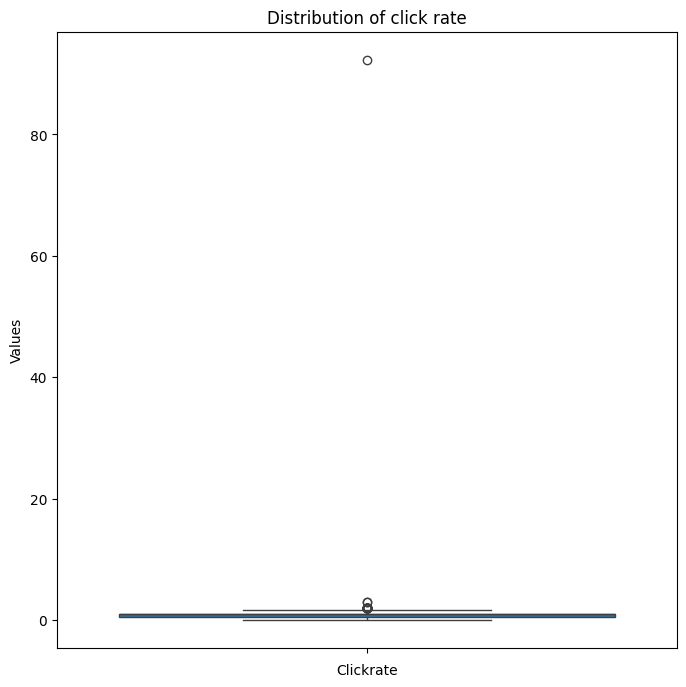

In [30]:
plt.figure(figsize=(8,8))
sns.boxplot(merged_df['clickrate'])
plt.xlabel('Clickrate')
plt.ylabel('Values')
plt.title('Distribution of click rate')
plt.show()

Since, the values are bound to be 0, logging of values can help us to undertsand better

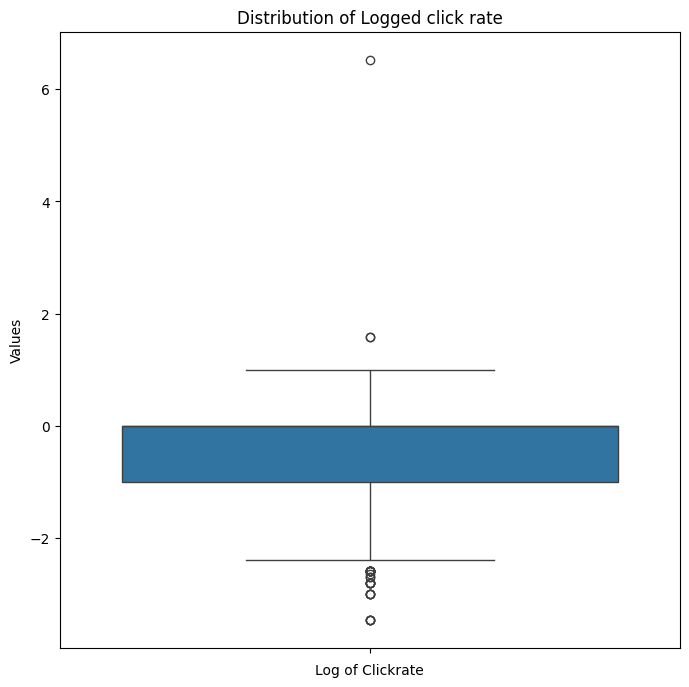

In [31]:
import numpy as np
merged_df['clickrate_log'] = np.log2(merged_df['clickrate'])
plt.figure(figsize=(8,8))
sns.boxplot(merged_df['clickrate_log'])
plt.xlabel('Log of Clickrate')
plt.ylabel('Values')
plt.title('Distribution of Logged click rate')
plt.show()

As we can see, some outliers existing below Q1 which implies that those links could have been clicked multiple times in the same pageview.

**Q6 : [Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.**

Pearson correlation measures the linear relationship between two numerical variables. To compute it, we need two sets of continuous numerical data.
Hence, we have to find the correlation between clicks and previews for each linkid. However, in the dataset, event is a categorical column (it contains "click", "preview", "pageview", etc.), not numerical data.

So, the steps are listed below to find Pearson correlation coefficient

* Step 1: Filtering only the values of 'Clicks' and 'Previews', as it is mentioned in the question.

* Step 2: Filtering and counting 'Clicks' and 'Previews' per linkid. Without this step, df["event"] would still be a categorical variable, which we cannot directly compute Pearson correlation on categorical data. Pearson correlation requires two numerical columns, but "event" is not numerical

* Step 3: Merging Click & Preview Counts Back. In Step 2, we computed the number of clicks and previews for each linkid. However, this information is stored separately in two different DataFrames (link_clicks and previews).This step merges these counts back into the main dataset (df_corr) so that each row contains:
1. The number of clicks for the corresponding linkid
2. The number of previews for the corresponding linkid

* Step 4: Computing Correlation. Before, computing correlation all non-numeric columns like event, date, linkid, country, city, artist, album and track are removed.

In [32]:
df_corr = df[df['event'].isin(['click','preview'])]
df_corr.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,84263,84263,84261,84261,84252,84262,84262,82036,84263
unique,2,7,206,8137,1549,2003,2155,628,2286
top,click,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,55732,12995,18461,8893,15666,15666,15666,15666,15666


In [33]:
link_clicks = df[df['event']== 'click'].groupby('linkid')['event'].count().reset_index()
link_clicks = link_clicks.rename(columns={'event':'click'})
link_clicks.head()

,linkid,click
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [35]:
preview = df[df['event']== 'preview'].groupby('linkid')['event'].count().reset_index()
preview = preview.rename(columns={'event':'preview'})
preview.head()

,linkid,preview
0,006af6a0-1f0d-4b0c-93bf-756af9071c06,11
1,00759b81-3f04-4a61-b934-f8fb3185f4a0,1
2,00829040-ee01-4409-966d-d67c7965144a,9
3,00de7566-f014-4d20-8616-82e4dea45b88,1
4,0211bf4d-0e9d-46c2-889c-f97872280820,141


In [42]:
#df_corr = df_corr.drop(columns=['click','preview','click_x', 'preview_x','click_y',	'preview_y','click_df','preview_df','click_clicks','preview_previews'], errors='ignore')
df_corr = pd.merge(left=df_corr, right=link_clicks, on='linkid', how='left',suffixes=('_df', '_clicks'))
df_corr = pd.merge(left=df_corr, right=preview, on='linkid', how='left',suffixes=('_df', '_previews'))
df_corr.head()

,event,date,country,city,artist,album,track,isrc,linkid,click,preview
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0


In [43]:
df_corr.dropna(subset=['click','preview'],inplace=True)

In [64]:
df_corr_numeric = df_corr.select_dtypes(include=['number'])
correlation_matrix = df_corr_numeric.corr()
print(correlation_matrix)

            click   preview
click    1.000000  0.998713
preview  0.998713  1.000000


In [67]:
from scipy import stats
stats.pearsonr(x=df_corr_numeric["click"], y=df_corr_numeric["preview"])

PearsonRResult(statistic=0.9987125072008585, pvalue=0.0)

This implies positive correlation between the number of clicks and previews which seems logical; given that the one is actually dependent on the other (can't have clicks without previews and vice versa).

In [68]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df_corr[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


There is a high positive correlation between album, artist, and track and almost no correlation between other variables. This is again expected, since those variables are naturally dependent, i.e., each track belongs to an album and is performed by an artist.